– Построить вариационный и статистический ряды по данной выборке, найти размах выборки;<br><br>
– Построить таблицу частот группированной выборки, сделав семь интервалов одинаковой длины;<br><br>
– Провести статистическую обработку результатов наблюдений, включающую построение (для<br>
интервально группированной выборки) полигона и гистограммы частот, эмпирической функции<br>
распределения;<br><br>
– Найти оценки математического ожидания, дисперсии (смещённую и несмещённую), медианы и<br>
моды для исходной (негруппированной) и интервально группированной выборок.<br>

In [21]:
import numpy as np
import scipy.stats as sts
import scipy as sci
import matplotlib.pyplot as plt
from tabulate import tabulate
%matplotlib inline

In [22]:
# данная выборка
val_list = [
1.88,
-1.58,
4.84,
1.08,
5.59,
7.34,
3.86,
0.22,
4.00,
2.73,
6.23,
17.23,
2.47,
-2.10,
-1.42,
7.44,
7.27,
9.02,
9.86,
7.20,
-4.50,
2.51,
3.27,
5.94,
0.42,
4.37,
5.51,
2.09,
9.04,
-0.35,
2.14,
6.76,
-0.43,
8.30,
12.00,
4.27,
0.89,
-1.04,
5.11,
3.25,
6.42,
6.41,
10.65,
4.22,
2.57,
2.49,
5.28,
3.10,
2.71,
1.94
]

In [23]:
# Вычисление параметров исходной выборки

min_val = min(val_list)
max_val = max(val_list)

delta = abs(min(val_list) - max(val_list))

positive_int_val = []

positive_int_val[:] = [int((elem + abs(min_val))*100) for elem in val_list]

bin_cnt = np.bincount(positive_int_val)

print('Размах выборки: ', delta)
print('Мода (полимодальная СВ):', sts.mode(val_list, keepdims=True)[0][0])
print('Медиана:', round(np.median(val_list), 2))
print('Выборочное среднее:', round(np.mean(val_list), 2))
print('Дисперсия:', round(sts.variation(val_list), 2))

Размах выборки:  21.73
Мода (полимодальная СВ): -4.5
Медиана: 3.93
Выборочное среднее: 4.17
Дисперсия: 0.94


In [24]:
# Статистический и вариацонный ряды

stat_raw = np.sort(list(set(val_list)))

variat_row = []

j = 0
for i in range(len(bin_cnt)):
    if(bin_cnt[i] != 0):
        variat_row.append([stat_raw[j], bin_cnt[i]])
        j += 1

print('Статистический ряд:')
print(tabulate(variat_row, headers=['stats', 'counts']))


Статистический ряд:
  stats    counts
-------  --------
  -4.5          1
  -2.1          1
  -1.58         1
  -1.42         1
  -1.04         1
  -0.43         1
  -0.35         1
   0.22         1
   0.42         1
   0.89         1
   1.08         1
   1.88         1
   1.94         1
   2.09         1
   2.14         1
   2.47         1
   2.49         1
   2.51         1
   2.57         1
   2.71         1
   2.73         1
   3.1          1
   3.25         1
   3.27         1
   3.86         1
   4            1
   4.22         1
   4.27         1
   4.37         1
   4.84         1
   5.11         1
   5.28         1
   5.51         1
   5.59         1
   5.94         1
   6.23         1
   6.41         1
   6.42         1
   6.76         1
   7.2          1
   7.27         1
   7.34         1
   7.44         1
   8.3          1
   9.02         1
   9.04         1
   9.86         1
  10.65         1
  12            1
  17.23         1


In [25]:

stat_tab_raw = []
index_raw = []

index_raw[:] = [int(elem) for elem in range(len(val_list))]

j = 0
for i in range(len(val_list)):
    stat_tab_raw.append([index_raw[j], stat_raw[i]])
    j += 1


print('Вариационный ряд:')
print(tabulate(stat_tab_raw, headers=['index','stats']))

Вариационный ряд:
  index    stats
-------  -------
      0    -4.5
      1    -2.1
      2    -1.58
      3    -1.42
      4    -1.04
      5    -0.43
      6    -0.35
      7     0.22
      8     0.42
      9     0.89
     10     1.08
     11     1.88
     12     1.94
     13     2.09
     14     2.14
     15     2.47
     16     2.49
     17     2.51
     18     2.57
     19     2.71
     20     2.73
     21     3.1
     22     3.25
     23     3.27
     24     3.86
     25     4
     26     4.22
     27     4.27
     28     4.37
     29     4.84
     30     5.11
     31     5.28
     32     5.51
     33     5.59
     34     5.94
     35     6.23
     36     6.41
     37     6.42
     38     6.76
     39     7.2
     40     7.27
     41     7.34
     42     7.44
     43     8.3
     44     9.02
     45     9.04
     46     9.86
     47    10.65
     48    12
     49    17.23


In [26]:
# my implementation
# step = delta / 7

# step_intervals = [round(min_val + step * n, 2) for n in range(8)]

# freq_intervals = []

# for j in range(1, len(step_intervals)):
#     cntr = 0
#     for i in range(len(variat_row)):
#         if(variat_row[i][0] <= step_intervals[j] and variat_row[i][0] >= step_intervals[j-1]):
#             cntr += 1
#     freq_intervals.append(cntr)

# print(freq_intervals)

freq_intervals_tab = []

# for i in range(1, len(step_intervals)):
#     freq_intervals_tab.append([step_intervals[i-1], step_intervals[i], freq_intervals[i-1]])

# print(tabulate(freq_intervals_tab, headers=['from', 'to', 'freq']))

# Таблица частот группированной выборки

hist, bins = np.histogram(val_list, bins=7, range=(min_val, max_val), weights=None, density= None)

for i in range(0, len(hist)):
    freq_intervals_tab.append([bins[i], bins[i + 1], hist[i]])

print('Таблица частот группированной выборки:')
print(tabulate(freq_intervals_tab, headers=['from', 'to', 'freq']))

Таблица частот группированной выборки:
    from        to    freq
--------  --------  ------
-4.5      -1.39571       4
-1.39571   1.70857       7
 1.70857   4.81286      18
 4.81286   7.91714      14
 7.91714  11.0214        5
11.0214   14.1257        1
14.1257   17.23          1


In [27]:
group_val_list = []

for i in range(0, len(freq_intervals_tab)):
    x = (freq_intervals_tab[i][0] + freq_intervals_tab[i][1]) / 2
    for j in range(freq_intervals_tab[i][2]):
        group_val_list.append(x)

# Вычисление параметров группированной выборки

min_group_val = min(group_val_list)
max_group_val = max(group_val_list)

delta = abs(min(val_list) - max(group_val_list))

positive_int_val = []

positive_int_val[:] = [int((elem + abs(min_group_val))*100) for elem in group_val_list]

bin_cnt = np.bincount(positive_int_val)

print('Размах выборки: ', delta)
print('Мода:', sts.mode(group_val_list, keepdims=True)[0][0])
print('Медиана:', round(np.median(group_val_list), 2))
print('Выборочное среднее:', round(np.mean(group_val_list), 2))
print('Дисперсия:', round(sts.variation(group_val_list), 2))

Размах выборки:  20.177857142857142
Мода: 3.2607142857142866
Медиана: 3.26
Выборочное среднее: 4.25
Дисперсия: 0.9


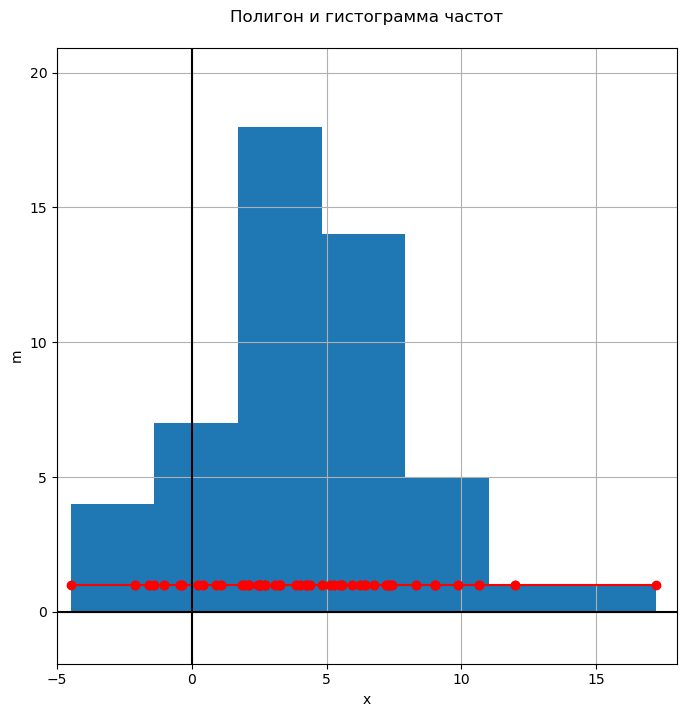

In [28]:
fig = plt.figure(figsize=(8, 8))

plt.title('Полигон и гистограмма частот\n')

for i in range(1, len(variat_row)):
  plt.plot([variat_row[i-1][0], variat_row[i][0]],
           [variat_row[i-1][1], variat_row[i][1]], 'ro-')

plt.xlabel('x')
plt.ylabel('m')

plt.grid()

plt.axis('equal')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.axis([-5, 18, 0, 19])

hist = plt.hist(val_list, bins=bins, range=(min_val, max_val), density=None, weights=None, 
                cumulative=False, histtype='bar',
                align='mid', orientation='vertical',
                log=False, color=None)

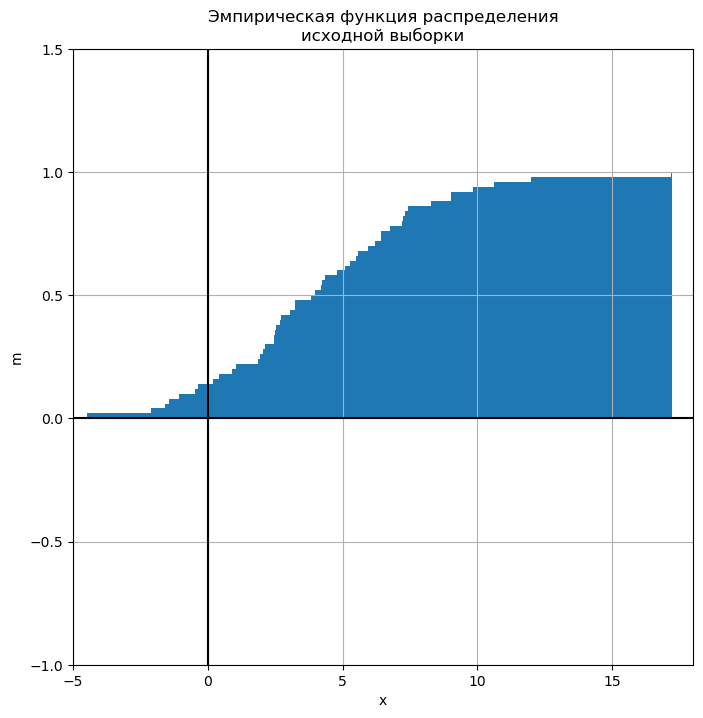

In [29]:
fig = plt.figure(figsize=(8, 8))

plt.xlabel('x')
plt.ylabel('m')

plt.grid()

# plt.axis('equal')

plt.title('Эмпирическая функция распределения\n'
          'исходной выборки')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.axis([-5, 18, -1, 1.5])

hist = plt.hist(val_list, bins=500, density=True, weights=None, 
        cumulative=True, histtype='bar',
        align='mid', orientation='vertical',
        log=False, color=None)

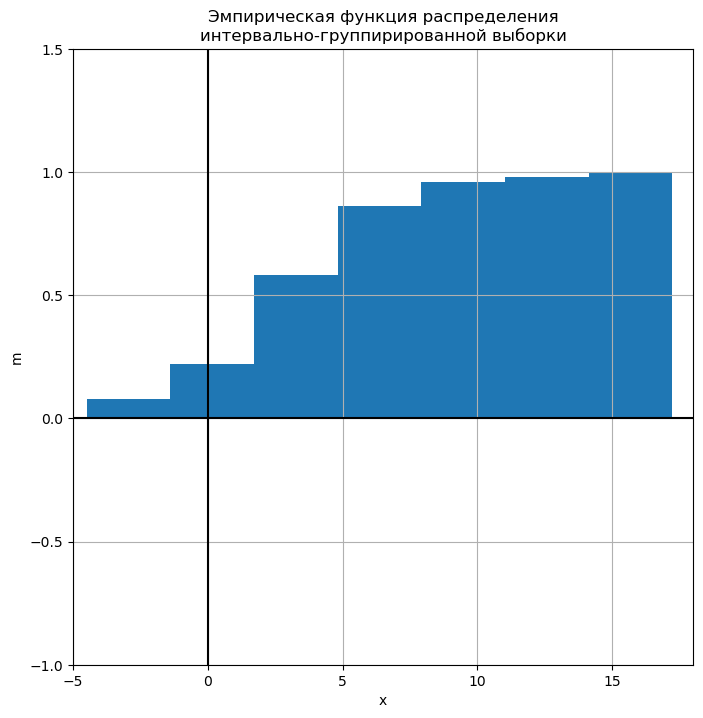

In [30]:
fig = plt.figure(figsize=(8, 8))

plt.xlabel('x')
plt.ylabel('m')

plt.grid()

# plt.axis('equal')

plt.title('Эмпирическая функция распределения\n'
          'интервально-группирированной выборки')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k') 

plt.axis([-5, 18, -1, 1.5])

hist = plt.hist(val_list, bins=7, range=(min_val, max_val), density=True, weights=None, 
        cumulative=True, histtype='bar',
        align='mid', orientation='vertical',
        log=False, color=None)